# Nonlocality Distillation Two Copies of Pure States

In [ ]:
# Installing qsharp
!pip install qsharp
!pip install qsharp_widgets
!pip install qsharp.estimator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.8/178.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement qsharp.estimator (from versions: none)
ERROR: No matching distribution found for qsharp.estimator


In [ ]:
# importing necessary modules for qsharp
import numpy as np
import qsharp
from qsharp.utils import dump_operation
from qsharp_widgets import Circuit
from qsharp_widgets import SpaceChart, EstimateDetails

# General imports
import numpy as np
import matplotlib.pyplot as plt

# Qsharp
import qsharp
from qsharp_widgets import EstimatesOverview
from qsharp.estimator import EstimatorParams, QubitParams, QECScheme

### Correlator A0 tensor B0

In [ ]:
Logical_qubits_Qsharp_NL2_1 = []
Logical_depth_Qsharp_NL2_1 = []
Num_T_gates_Qsharp_NL2_1 = []
Runtime_Qsharp_NL2_1 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
S= [[[0,0,0,0],float(sqrt((Cos_theta)**4))],[[0,1,0,1],float(sqrt((Cos_theta*Sin_theta)**2))],[[1,0,1,0],float(sqrt((Cos_theta*Sin_theta)**2))],[[1,1,1,1],float(sqrt((Sin_theta)**4))]] # Two qubit state
S

[[[0, 0, 0, 0], 0.7999999999999996],
 [[0, 1, 0, 1], 0.39999999999999986],
 [[1, 0, 1, 0], 0.39999999999999986],
 [[1, 1, 1, 1], 0.19999999999999998]]

In [ ]:
np.linalg.norm([(Cos_theta)**2,Cos_theta*Sin_theta,Cos_theta*Sin_theta,(Sin_theta)**2])

np.float64(0.9999999999999996)

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)



In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;

operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }

    Microsoft.Quantum.Diagnostics.DumpMachine();

    //Alices qubit 0 and 1
    //Bob qubits 2 and 3
    // We have to apply unitaries on q[0] for Alice and on q[2] for Bob

    function UB0Theta(p : Double) : Double {
    let s = Sqrt(2.0 - 4.0*p + 4.0*p*p);
    let a = (-1.0 + 2.0*p - s) / Sqrt(1.0 + (1.0 - 2.0*p + s)*(1.0 - 2.0*p + s));
    return 2.0 * ArcCos(a);
    }


    // UA0
    //X(q[0]);
    //Identity matrix on q[0]

    // UB0
    //Identity matrix on q[3]
    let theta = UB0Theta(p);
    Ry(theta, q[2]);


    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }


In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|0000⟩: 0.6667+0.0000𝑖
|0101⟩: 0.4714+0.0000𝑖
|1010⟩: 0.4714+0.0000𝑖
|1111⟩: 0.3333+0.0000𝑖
STATE:
|0000⟩: −0.2888+0.0000𝑖
|0010⟩: 0.6009+0.0000𝑖
|0101⟩: −0.2042+0.0000𝑖
|0111⟩: 0.4249+0.0000𝑖
|1000⟩: −0.4249+0.0000𝑖
|1010⟩: −0.2042+0.0000𝑖
|1101⟩: −0.3004+0.0000𝑖
|1111⟩: −0.1444+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 87870,
  'runtime': 374000,
  'rqops': 3409091,
  'breakdown': {'algorithmicLogicalQubits': 15,
   'algorithmicLogicalDepth': 85,
   'logicalDepth': 85,
   'numTstates': 91,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 13,
   'numTfactoryRuns': 7,
   'physicalQubitsForTfactories': 84240,
   'physicalQubitsForAlgorithm': 3630,
   'requiredLogicalQubitErrorRate': 2.61437908496732e-07,
   'requiredLogicalTstateErrorRate': 3.6630036630036627e-06,
   'numTsPerRotation': 13,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '374 microsecs',
  'rqops': '3.41M',
  'physicalQubits': '87.87k',
  'algorithmicLogicalQubits': '15',
  'algorithmicLogicalDepth': '85',
  'logicalDepth': '85',
  'numTstates': '91',
  'numTfactories': '13',
  'numTfactoryRuns': '7',
  'physicalQubitsForAlgorithm': '3.63k',
  'physicalQubitsForTfactories': '84.24k',
  'physicalQubitsForTfactoriesPercentage': '95.87 %',
  'requiredLogicalQubitErrorRate': '2.61e-7',
  'requiredLogicalTstateErrorRate': '3.66e-6',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '6.48k',
  'tfactoryRuntime': '47 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '9',
  'physicalQubitsPerRound': '6.48k',
  'tfactoryRuntimePerRound': '47 microsecs',
  'tstateLogicalErrorRate': '2.17e-6',
  'logicalCountsNumQubits': '4',
  'logicalCountsTCount': '0',
  'logicalCountsRotationCount': '7',
  'logicalCountsRotationDepth': '6',
  'logicalCountsCczCount': '0',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '0',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '13',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 6480,
  'runtime': 46800,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [9],
  'physicalQubitsPerRound': [6480],
  'runtimePerRound': [46800],
  'logicalErrorRate': 2.165000000000001e-06},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 4,
  'tCount': 0,
  'rotationCount': 7,
  'rotationDepth': 6,
  'cczCount': 0,
  'ccixCount': 0,
  'measurementCount': 0},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime estimate for the

In [ ]:
SpaceChart(result)

NameError: name 'SpaceChart' is not defined

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_NL2_1.append(logical_qubits)
Logical_depth_Qsharp_NL2_1.append(logical_depth)
Num_T_gates_Qsharp_NL2_1.append(Num_T_states)
Runtime_Qsharp_NL2_1.append(Runtime)

print("Logical_qubits_Qsharp_NL2_1 = ",Logical_qubits_Qsharp_NL2_1)
print("Logical_depth_Qsharp_NL2_1 = ",Logical_depth_Qsharp_NL2_1)
print("Num_T_gates_Qsharp_NL2_1 = ",Num_T_gates_Qsharp_NL2_1)
print("Runtime_Qsharp_NL2_1 = ",Runtime_Qsharp_NL2_1)

Logical_qubits_Qsharp_NL2_1 =  [15, 15, 15, 15, 15]
Logical_depth_Qsharp_NL2_1 =  [85, 85, 85, 85, 85]
Num_T_gates_Qsharp_NL2_1 =  [91, 91, 91, 91, 91]
Runtime_Qsharp_NL2_1 =  [0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004]


### Correlator A0 tensor B1

In [ ]:
Logical_qubits_Qsharp_NL2_2 = []
Logical_depth_Qsharp_NL2_2 = []
Num_T_gates_Qsharp_NL2_2 = []
Runtime_Qsharp_NL2_2 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
S= [[[0,0,0,0],float(Cos_theta)**4],[[0,1,0,1],float(Cos_theta*Sin_theta)**2],[[1,0,1,0],float(Cos_theta*Sin_theta)**2],[[1,1,1,1],float(Sin_theta)**4]] # Two qubit state
S

[[[0, 0, 0, 0], 0.6399999999999993],
 [[0, 1, 0, 1], 0.1599999999999999],
 [[1, 0, 1, 0], 0.1599999999999999],
 [[1, 1, 1, 1], 0.039999999999999994]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)



In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;

operation test(p:Double, n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }

    function UB1Theta(p : Double) : Double {
    let s = Sqrt(2.0 - 4.0*p + 4.0*p*p);
    let a = (1.0 - 2.0*p + s) / Sqrt(1.0 + (1.0 - 2.0*p + s)*(1.0 - 2.0*p + s));
    return 2.0 * ArcCos(a);
    }

    // UA0
    //X(q[0]);
    //Identity matrix on q[0]


    // UB1
    let theta = UB1Theta(p);
    Ry(theta, q[2]);
    //Identity matrix on q[2]



    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }


In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|0000⟩: −0.3605+0.0000𝑖
|0010⟩: 0.1733+0.0000𝑖
|0101⟩: −0.1803+0.0000𝑖
|0111⟩: 0.0866+0.0000𝑖
|1000⟩: 0.3466+0.0000𝑖
|1010⟩: 0.7210+0.0000𝑖
|1101⟩: 0.1733+0.0000𝑖
|1111⟩: 0.3605+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 87870,
  'runtime': 374000,
  'rqops': 3409091,
  'breakdown': {'algorithmicLogicalQubits': 15,
   'algorithmicLogicalDepth': 85,
   'logicalDepth': 85,
   'numTstates': 91,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 13,
   'numTfactoryRuns': 7,
   'physicalQubitsForTfactories': 84240,
   'physicalQubitsForAlgorithm': 3630,
   'requiredLogicalQubitErrorRate': 2.61437908496732e-07,
   'requiredLogicalTstateErrorRate': 3.6630036630036627e-06,
   'numTsPerRotation': 13,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '374 microsecs',
  'rqops': '3.41M',
  'physicalQubits': '87.87k',
  'algorithmicLogicalQubits': '15',
  'algorithmicLogicalDepth': '85',
  'logicalDepth': '85',
  'numTstates': '91',
  'numTfactories': '13',
  'numTfactoryRuns': '7',
  'physicalQubitsForAlgorithm': '3.63k',
  'physicalQubitsForTfactories': '84.24k',
  'physicalQubitsForTfactoriesPercentage': '95.87 %',
  'requiredLogicalQubitErrorRate': '2.61e-7',
  'requiredLogicalTstateErrorRate': '3.66e-6',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '6.48k',
  'tfactoryRuntime': '47 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '9',
  'physicalQubitsPerRound': '6.48k',
  'tfactoryRuntimePerRound': '47 microsecs',
  'tstateLogicalErrorRate': '2.17e-6',
  'logicalCountsNumQubits': '4',
  'logicalCountsTCount': '0',
  'logicalCountsRotationCount': '7',
  'logicalCountsRotationDepth': '6',
  'logicalCountsCczCount': '0',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '0',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '13',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 6480,
  'runtime': 46800,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [9],
  'physicalQubitsPerRound': [6480],
  'runtimePerRound': [46800],
  'logicalErrorRate': 2.165000000000001e-06},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 4,
  'tCount': 0,
  'rotationCount': 7,
  'rotationDepth': 6,
  'cczCount': 0,
  'ccixCount': 0,
  'measurementCount': 0},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime estimate for the

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_NL2_2.append(logical_qubits)
Logical_depth_Qsharp_NL2_2.append(logical_depth)
Num_T_gates_Qsharp_NL2_2.append(Num_T_states)
Runtime_Qsharp_NL2_2.append(Runtime)

print("Logical_qubits_Qsharp_NL2_2 = ",Logical_qubits_Qsharp_NL2_2)
print("Logical_depth_Qsharp_NL2_2 = ",Logical_depth_Qsharp_NL2_2)
print("Num_T_gates_Qsharp_NL2_2 = ",Num_T_gates_Qsharp_NL2_2)
print("Runtime_Qsharp_NL2_2 = ",Runtime_Qsharp_NL2_2)

Logical_qubits_Qsharp_NL2_2 =  [15, 15, 15, 15, 15]
Logical_depth_Qsharp_NL2_2 =  [85, 85, 85, 85, 85]
Num_T_gates_Qsharp_NL2_2 =  [91, 91, 91, 91, 91]
Runtime_Qsharp_NL2_2 =  [0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004]


### Correlator A1 tensor B0

In [ ]:
Logical_qubits_Qsharp_NL2_3 = []
Logical_depth_Qsharp_NL2_3 = []
Num_T_gates_Qsharp_NL2_3 = []
Runtime_Qsharp_NL2_3 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
S= [[[0,0,0,0],float(Cos_theta)**4],[[0,1,0,1],float(Cos_theta*Sin_theta)**2],[[1,0,1,0],float(Cos_theta*Sin_theta)**2],[[1,1,1,1],float(Sin_theta)**4]] # Two qubit state
S

[[[0, 0, 0, 0], 0.6399999999999993],
 [[0, 1, 0, 1], 0.1599999999999999],
 [[1, 0, 1, 0], 0.1599999999999999],
 [[1, 1, 1, 1], 0.039999999999999994]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)



In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;

operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }

    function UB0Theta(p : Double) : Double {
    let s = Sqrt(2.0 - 4.0*p + 4.0*p*p);
    let a = (-1.0 + 2.0*p - s) / Sqrt(1.0 + (1.0 - 2.0*p + s)*(1.0 - 2.0*p + s));
    return 2.0 * ArcCos(a);
    }

    // UA1
    H(q[0]);
    //Rz(0.0,q[0]);
    //Ry(7.0 * PI() / 4.0,q[0]);
    //Rz(0.0,q[0]);
    //X(q[0]);
    //Identity matrix on q[0]

    // UB0
    //Identity matrix on q[3]
    let theta = UB0Theta(p);
    Ry(theta, q[2]);


    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }


In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|0000⟩: −0.5000+0.0000𝑖
|0010⟩: 0.3873+0.0000𝑖
|0101⟩: −0.2500+0.0000𝑖
|0111⟩: 0.1937+0.0000𝑖
|1000⟩: 0.0099+0.0000𝑖
|1010⟩: 0.6324+0.0000𝑖
|1101⟩: 0.0049+0.0000𝑖
|1111⟩: 0.3162+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCorrectio…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(result)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 81390,
  'runtime': 378400,
  'rqops': 3409091,
  'breakdown': {'algorithmicLogicalQubits': 15,
   'algorithmicLogicalDepth': 86,
   'logicalDepth': 86,
   'numTstates': 92,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 12,
   'numTfactoryRuns': 8,
   'physicalQubitsForTfactories': 77760,
   'physicalQubitsForAlgorithm': 3630,
   'requiredLogicalQubitErrorRate': 2.583979328165375e-07,
   'requiredLogicalTstateErrorRate': 3.6231884057971013e-06,
   'numTsPerRotation': 13,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '378 microsecs',
  'rqops': '3.41M',
  'physicalQubits': '81.39k',
  'algorithmicLogicalQubits': '15',
  'algorithmicLogicalDepth': '86',
  'logicalDepth': '86',
  'numTstates': '92',
  'numTfactories': '12',
  'numTfactoryRuns': '8',
  'physicalQubitsForAlgorithm': '3.63k',
  'physicalQubitsForTfactories': '77.76k',
  'physicalQubitsForTfactoriesPercentage': '95.54 %',
  'requiredLogicalQubitErrorRate': '2.58e-7',
  'requiredLogicalTstateErrorRate': '3.62e-6',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '6.48k',
  'tfactoryRuntime': '47 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '9',
  'physicalQubitsPerRound': '6.48k',
  'tfactoryRuntimePerRound': '47 microsecs',
  'tstateLogicalErrorRate': '2.17e-6',
  'logicalCountsNumQubits': '4',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '7',
  'logicalCountsRotationDepth': '6',
  'logicalCountsCczCount': '0',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '0',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '13',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 6480,
  'runtime': 46800,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [9],
  'physicalQubitsPerRound': [6480],
  'runtimePerRound': [46800],
  'logicalErrorRate': 2.165000000000001e-06},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 4,
  'tCount': 1,
  'rotationCount': 7,
  'rotationDepth': 6,
  'cczCount': 0,
  'ccixCount': 0,
  'measurementCount': 0},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime estimate for th

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_NL2_3.append(logical_qubits)
Logical_depth_Qsharp_NL2_3.append(logical_depth)
Num_T_gates_Qsharp_NL2_3.append(Num_T_states)
Runtime_Qsharp_NL2_3.append(Runtime)

print("Logical_qubits_Qsharp_NL2_3 = ",Logical_qubits_Qsharp_NL2_3)
print("Logical_depth_Qsharp_NL2_3 = ",Logical_depth_Qsharp_NL2_3)
print("Num_T_gates_Qsharp_NL2_3 = ",Num_T_gates_Qsharp_NL2_3)
print("Runtime_Qsharp_NL2_3 = ",Runtime_Qsharp_NL2_3)

Logical_qubits_Qsharp_NL2_3 =  [15, 15, 15, 15, 15]
Logical_depth_Qsharp_NL2_3 =  [86, 86, 86, 86, 86]
Num_T_gates_Qsharp_NL2_3 =  [92, 92, 92, 92, 92]
Runtime_Qsharp_NL2_3 =  [0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004]


### Correlator A1 tensor B1

In [ ]:
Logical_qubits_Qsharp_NL2_4 = []
Logical_depth_Qsharp_NL2_4 = []
Num_T_gates_Qsharp_NL2_4 = []
Runtime_Qsharp_NL2_4 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
S= [[[0,0,0,0],float(Cos_theta)**4],[[0,1,0,1],float(Cos_theta*Sin_theta)**2],[[1,0,1,0],float(Cos_theta*Sin_theta)**2],[[1,1,1,1],float(Sin_theta)**4]] # Two qubit state
S

[[[0, 0, 0, 0], 0.6399999999999993],
 [[0, 1, 0, 1], 0.1599999999999999],
 [[1, 0, 1, 0], 0.1599999999999999],
 [[1, 1, 1, 1], 0.039999999999999994]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)



In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;

operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }

    function UB1Theta(p : Double) : Double {
    let s = Sqrt(2.0 - 4.0*p + 4.0*p*p);
    let a = (1.0 - 2.0*p + s) / Sqrt(1.0 + (1.0 - 2.0*p + s)*(1.0 - 2.0*p + s));
    return 2.0 * ArcCos(a);
    }

    // UA1
    H(q[0]);
    //Rz(0.0,q[0]);
    //Ry(7.0 * PI() / 4.0,q[0]);
    //Rz(0.0,q[0]);
    //X(q[0]);
    //Identity matrix on q[0]


    // UB1
    let theta = UB1Theta(p);
    Ry(theta, q[2]);
    //Identity matrix on q[2]


    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }


In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|0000⟩: 0.4657+0.0000𝑖
|0010⟩: 0.1158+0.0000𝑖
|0101⟩: 0.2328+0.0000𝑖
|0111⟩: 0.0579+0.0000𝑖
|1000⟩: −0.1822+0.0000𝑖
|1010⟩: −0.7325+0.0000𝑖
|1101⟩: −0.0911+0.0000𝑖
|1111⟩: −0.3662+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCorrectio…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(result)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 81390,
  'runtime': 378400,
  'rqops': 3409091,
  'breakdown': {'algorithmicLogicalQubits': 15,
   'algorithmicLogicalDepth': 86,
   'logicalDepth': 86,
   'numTstates': 92,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 12,
   'numTfactoryRuns': 8,
   'physicalQubitsForTfactories': 77760,
   'physicalQubitsForAlgorithm': 3630,
   'requiredLogicalQubitErrorRate': 2.583979328165375e-07,
   'requiredLogicalTstateErrorRate': 3.6231884057971013e-06,
   'numTsPerRotation': 13,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '378 microsecs',
  'rqops': '3.41M',
  'physicalQubits': '81.39k',
  'algorithmicLogicalQubits': '15',
  'algorithmicLogicalDepth': '86',
  'logicalDepth': '86',
  'numTstates': '92',
  'numTfactories': '12',
  'numTfactoryRuns': '8',
  'physicalQubitsForAlgorithm': '3.63k',
  'physicalQubitsForTfactories': '77.76k',
  'physicalQubitsForTfactoriesPercentage': '95.54 %',
  'requiredLogicalQubitErrorRate': '2.58e-7',
  'requiredLogicalTstateErrorRate': '3.62e-6',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '6.48k',
  'tfactoryRuntime': '47 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '9',
  'physicalQubitsPerRound': '6.48k',
  'tfactoryRuntimePerRound': '47 microsecs',
  'tstateLogicalErrorRate': '2.17e-6',
  'logicalCountsNumQubits': '4',
  'logicalCountsTCount': '1',
  'logicalCountsRotationCount': '7',
  'logicalCountsRotationDepth': '6',
  'logicalCountsCczCount': '0',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '0',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '13',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 6480,
  'runtime': 46800,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [9],
  'physicalQubitsPerRound': [6480],
  'runtimePerRound': [46800],
  'logicalErrorRate': 2.165000000000001e-06},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 4,
  'tCount': 1,
  'rotationCount': 7,
  'rotationDepth': 6,
  'cczCount': 0,
  'ccixCount': 0,
  'measurementCount': 0},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime estimate for th

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_states = result['physicalCounts']["breakdown"]["numTstates"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_NL2_4.append(logical_qubits)
Logical_depth_Qsharp_NL2_4.append(logical_depth)
Num_T_gates_Qsharp_NL2_4.append(Num_T_states)
Runtime_Qsharp_NL2_4.append(Runtime)

print("Logical_qubits_Qsharp_NL2_4 = ",Logical_qubits_Qsharp_NL2_4)
print("Logical_depth_Qsharp_NL2_4 = ",Logical_depth_Qsharp_NL2_4)
print("Num_T_gates_Qsharp_NL2_4 = ",Num_T_gates_Qsharp_NL2_4)
print("Runtime_Qsharp_NL2_4 = ",Runtime_Qsharp_NL2_4)

Logical_qubits_Qsharp_NL2_4 =  [15, 15, 15, 15, 15]
Logical_depth_Qsharp_NL2_4 =  [86, 86, 86, 86, 86]
Num_T_gates_Qsharp_NL2_4 =  [92, 92, 92, 92, 92]
Runtime_Qsharp_NL2_4 =  [0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004, 0.00037840000000000004]


# Final Result

In [ ]:
# Logical qubits
Logical_qubits_Qsharp_NL2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Logical_qubits_Qsharp_NL2_1,
        Logical_qubits_Qsharp_NL2_2,
        Logical_qubits_Qsharp_NL2_3,
        Logical_qubits_Qsharp_NL2_4
    )
]

# Logical depth
Logical_depth_Qsharp_NL2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Logical_depth_Qsharp_NL2_1,
        Logical_depth_Qsharp_NL2_2,
        Logical_depth_Qsharp_NL2_3,
        Logical_depth_Qsharp_NL2_4
    )
]

# T gates
Num_T_gates_Qsharp_NL2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Num_T_gates_Qsharp_NL2_1,
        Num_T_gates_Qsharp_NL2_2,
        Num_T_gates_Qsharp_NL2_3,
        Num_T_gates_Qsharp_NL2_4
    )
]

# Runtime
Runtime_Qsharp_NL2 = [
    a + b + c + d
    for a, b, c, d in zip(
        Runtime_Qsharp_NL2_1,
        Runtime_Qsharp_NL2_2,
        Runtime_Qsharp_NL2_3,
        Runtime_Qsharp_NL2_4
    )
]
print(Logical_qubits_Qsharp_NL2)
print(Logical_depth_Qsharp_NL2)
print(Num_T_gates_Qsharp_NL2)
print(Runtime_Qsharp_NL2)

[60, 60, 60, 60, 60]
[342, 342, 342, 342, 342]
[366, 366, 366, 366, 366]
[0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001, 0.0015048000000000001]


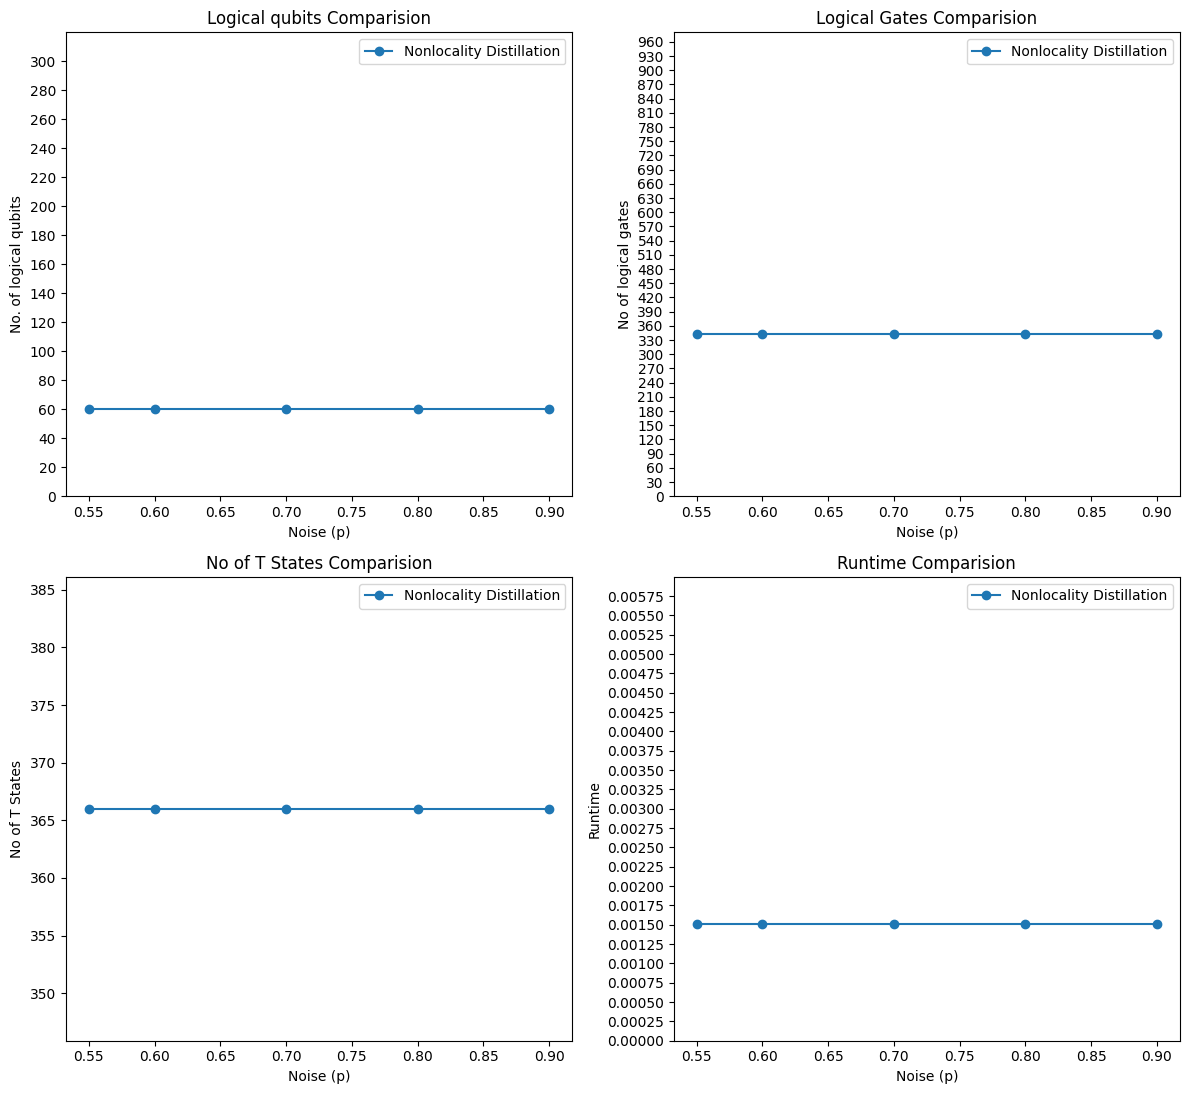

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# # Sample data for the graphs
# labels = [str(i) for i in range(1, 101)]
labels = [0.55,0.6,0.7,0.8,0.9] #Noise
# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# First subplot
axs[0, 0].plot(labels, Logical_qubits_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 0].plot(labels, Logical_qubits_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[0, 0].set_title('Logical qubits Comparision')
axs[0, 0].set_ylabel('No. of logical qubits')
axs[0, 0].set_xlabel("Noise (p)")
axs[0, 0].legend()
axs[0, 0].set_ylim(0, 320)  # Set y-axis limits
axs[0, 0].set_yticks(np.arange(0, 320, 20))  # Set y-axis ticks


# Second subplot
axs[0, 1].plot(labels, Logical_depth_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[0, 1].plot(labels, Logical_depth_Qsharp_EC2, marker='o', label='NEntangleemnt Concentration')
axs[0, 1].set_title('Logical Gates Comparision')
axs[0, 1].set_ylabel('No of logical gates')
axs[0, 1].set_xlabel("Noise (p)")
axs[0, 1].legend()
axs[0, 1].set_ylim(0, 980)  # Set y-axis limits
axs[0, 1].set_yticks(np.arange(0, 980, 30))  # Set y-axis ticks


# Third subplot
axs[1, 0].plot(labels, Num_T_gates_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 0].plot(labels, Num_T_gates_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[1, 0].set_title('No of T States Comparision')
axs[1, 0].set_ylabel('No of T States')
axs[1, 0].set_xlabel("Noise (p)")
axs[1, 0].legend()


# Fourth subplot
axs[1, 1].plot(labels, Runtime_Qsharp_NL2, marker='o', label='Nonlocality Distillation')
axs[1, 1].plot(labels, Runtime_Qsharp_EC2, marker='o', label='Entangleemnt Concentration')
axs[1, 1].set_title('Runtime Comparision')
axs[1, 1].set_ylabel('Runtime')
axs[1, 1].set_xlabel("Noise (p)")
axs[1, 1].legend()
axs[1, 1].set_ylim(0, 0.006)  # Set y-axis limits
axs[1, 1].set_yticks(np.arange(0, 0.006, 0.00025))  # Set y-axis ticks

# Adjust the layout
# plt.tight_layout()

# Add a title to the entire figure
# fig.suptitle('Simulation and Resource Estimation of Niels implimentation vs Current Methods of N Qubits GHZ state preparation', fontsize=12)

# Combine handles and labels from all subplots
# handles, labels = axs[0, 0].get_legend_handles_labels()

# # Create a single legend for the entire figure
# fig.legend(handles, labels, loc='Lower left', ncol=2)

# Create a single legend for the entire figure
# fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1, 0.1))

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Save the figure
# plt.savefig('GHZ.png')

# Show the figure
plt.show()

#Complete Nonlocality Distillation of CHSH

In [ ]:
Logical_qubits_Qsharp_NL2 = []
Logical_depth_Qsharp_NL2 = []
Num_T_gates_Qsharp_NL2 = []
Runtime_Qsharp_NL2 = []

In [ ]:
from numpy import sqrt
Noise = [0.55,0.6,0.7,0.8,0.9];
p=Noise[4];
Cos_theta =  (sqrt(p)+sqrt(1-p))/sqrt(2);
Sin_theta =  (sqrt(p)-sqrt(1-p))/sqrt(2);
Cos_theta**2 + Sin_theta**2;

In [ ]:
S= [[[0,0,0,0],float(Cos_theta)**4],[[0,1,0,1],float(Cos_theta*Sin_theta)**2],[[1,0,1,0],float(Cos_theta*Sin_theta)**2],[[1,1,1,1],float(Sin_theta)**4]] # Two qubit state
S

[[[0, 0, 0, 0], 0.6399999999999993],
 [[0, 1, 0, 1], 0.1599999999999999],
 [[1, 0, 1, 0], 0.1599999999999999],
 [[1, 1, 1, 1], 0.039999999999999994]]

In [ ]:
List_1=[]    # store history of Gate types and their parameters (qubit numbering on which they are applied)
List_2=[]    # Store X Gate history
List_3=[]    # Store CX Gate history
List_4=[]    # Store Multi- controlled Gate history
List_5=[]    # Store Last step X Gates information


n=len(S[0][0])        # n is number of qubits in required Sparse State.
n9=[]                 # list of required number of control qubits in each splitting stage

def find_qubit_with_unequal_sets(T): # This function is called from classical part of the algorithm i,e, function Algo1()

        best_qubit = None
        T_0=[]
        T_1=[]
        Max_difference = float('-inf')  # Initialize to negative infinity

        for b in range(n):
            # Split T into T_0 and T_1 based on qubit b
            T_0 = [x for x in T if x[0][b] == 0]
            T_1 = [x for x in T if x[0][b] == 1]

            # Check if both sets are non-empty
            if len(T_0) != 0 and len(T_1) != 0:
                difference = abs(len(T_0) - len(T_1))
                if difference > Max_difference:
                    Max_difference = difference
                    best_qubit = b
                    best_T_0 = T_0
                    best_T_1 = T_1

        return best_qubit,best_T_0, best_T_1

def NOT(a):       # This is also needed as a part of updating basis state set S in each recursion of Algo1()
        if a==0:
            return 1
        else:
            return 0


def Algo_1():    # This is classical function called by quantum function which can create Required Gates information in Lists
        dif_qubits = []
        dif_values = []
        T = S
        P = find_qubit_with_unequal_sets(T)


        # Step 5: Main loop
        while len(T) > 1:
            # Step 6: Find the qubit b
            P = find_qubit_with_unequal_sets(T)  # We already implement this logic to find the best qubit best_T_0 and best_T_1 above
            b = P[0]
            T_0 = P[1]
            T_1 = P[2]

            # Step 7: Append b to dif_qubits
            dif_qubits.append(b)
            if len(T_0) < len(T_1):
                # Step 9: Set T = T_0 and append 0 to dif_values
                T = T_0
                dif_values.append(0)
            else:
                # Step 10: Set T = T_1 and append 1 to dif_values
                T = T_1
                dif_values.append(1)
        # Step 14: Pop the last value appended to dif_qubits and store it as dif
        dif = dif_qubits.pop();
        #print("dif is  ", dif)
    # Step 15: Pop the last value that was appended to dif_values
        dif_values.pop();
    # Step 16: Store the single element in T as x_1
        x_1 = T[0]
    # step 17
    # T_prime subset of S denote the set of strings that have the values in dif_values on the bits dif_qubits
        T_prime = [x for x in S if all(x[0][q] == v for q, v in zip(dif_qubits, dif_values))]
    # Step 18: Remove x_1 from T'
        T_prime.remove(x_1)
    # Step 19: Second While loop for T_prime
        while len(T_prime) > 1:
        # Step 22: Find the qubit b_prime
            R = find_qubit_with_unequal_sets(T_prime)  # Implement logic to find the best qubit
            b_prime = R[0]
            T_prime_0 = R[1]
            T_prime_1 = R[2]
        # Step 7: Append b to dif_qubits

            dif_qubits.append(b_prime)

            if len(T_prime_0) < len(T_prime_1):
            # Step 9: Set T = T_0 and append 0 to dif_values
                T_prime = T_prime_0
                dif_values.append(0)
            else:
            # Step 10: Set T = T_1 and append 1 to dif_values
                T_prime = T_prime_1
                dif_values.append(1)
        x_2 = T_prime[0]


        if x_1[0][dif] != 1:
            List_1.append(1)
            List_2.append(n-1-dif)
            for x in S:
                x[0][dif]= NOT(x[0][dif])


        for b in range(n):
            if b != dif and x_1[0][b] != x_2[0][b]:
                # target b controlled on dif

                List_1.append(2)
                sx=[n-1-dif,n-1-b]
                List_3.append(sx)
                for x in S:
                    if x[0][dif]==1:
                        x[0][b]= NOT(x[0][b])

        for b in dif_qubits:
            if x_2[0][b] != 1:
                # not gate on line b
                List_1.append(1)
                List_2.append(n-1-b)
                for x in S:
                    x[0][b]= NOT(x[0][b])

        # virtual merging operation begins

        beta = x_1[1]            # probability of x_1
        alpha = x_2[1]           #probability of x_2

        # x_1 would merge into x_2   i.e.  x2 absorb probability of x1
        x_2[1]=x_2[1]+x_1[1]
        alpha=alpha/x_2[1]
        beta=beta/x_2[1]
        List_1.append(3)

        if len(dif_qubits)>0:
            n9.append(len(dif_qubits))
            sy = [alpha,beta,dif_qubits,dif]
        else:
            sy = [alpha,beta,dif]

        List_4.append(sy)
        # print("S before removing x1 is",S)
        S.remove(x_1)
        # print("S after removing x1 is",S)
        if len(S)>1:
            Algo_1()

        else:
            List_1.append(4)
            List_5.append(x_2[0])

def convert_to_tuples(input_list):
        output_list = []
        for sublist in input_list:
            if len(sublist) == 3:
                sublist.insert(-1, [-1])
            output_list.append(tuple(sublist))
        return output_list


if len(S)>1:
      Algo_1()



List_4 = convert_to_tuples(List_4)



In [ ]:
%%qsharp

open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Math;

operation test(p:Double , n:Int , List_1: Int[] , List_2:Int[] , List_3: Int[][] , List_4 : (Double,Double,Int[],Int)[] , List_5:Int[][]) : Unit {


    use q = Qubit[n];

    mutable n1 = Length(List_1);
    mutable Reversed_List_1 = List_1[Length(List_1) - 1 .. -1 .. 0];
    mutable List_2 =List_2;
    mutable List_3 =List_3;
    mutable List_4 =List_4;
    mutable List_5 =List_5;
    for i in Reversed_List_1 {

        if (i == 1)
        {
            mutable n2 = Length(List_2);
            mutable read_2 =List_2[n2-1];
            X(q[read_2]);
            set List_2 = List_2[0..Length(List_2)-2];

        }

        elif (i == 2)
        {
            mutable n3 = Length(List_3);
            mutable read_3 = List_3[n3-1];
            mutable r1 = read_3[0];
            mutable r2 = read_3[1];
            set List_3 = List_3[0..Length(List_3)-2];
            CX(q[r1],q[r2]) ;
        }

        elif (i == 3)
        {
          mutable n4 = Length(List_4);
          mutable read_4 = List_4[n4-1];
          mutable (a,b,c,d) = read_4;

          if c == [-1] {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            Ry(w,q[target]);
            X(q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];

          }

          else
          {
            mutable sy1 = a;
            mutable sy2= b ;
            mutable  w = ArcTan(AbsD(sy1^0.5) / AbsD(sy2^0.5));
            mutable target = (n-1)-d;
            let indices = c;
            mutable control = Repeated(q[0], Length(indices));
            Ry(w,q[target]);
            for idx in 0..Length(indices)-1 {
            set control w/= idx <- q[(n-1)-(indices[idx])];
            }
            Controlled X (control,q[target]);
            Ry(-w,q[target]);
            set List_4 = List_4[0..Length(List_4)-2];
          }

        }

        elif (i == 4)
        {
            mutable read_5 = List_5[0];
            mutable n5= Length(read_5);
                for b in 0..n5-1{
                    if (read_5[b]==1) {
                        X(q[(n-1)-b])}
                }
            set List_5 = List_5[0..Length(List_5)-1];

        }
        }


    //Alices qubit 0 and 1
    //Bob qubits 2 and 3
    // We have to apply unitaries on q[0] for Alice and on q[2] for Bob

    function UB0Theta(p : Double) : Double {
    let s = Sqrt(2.0 - 4.0*p + 4.0*p*p);
    let a = (-1.0 + 2.0*p - s) / Sqrt(1.0 + (1.0 - 2.0*p + s)*(1.0 - 2.0*p + s));
    return 2.0 * ArcCos(a);
    }

    // UA0
    X(q[0]);
    //Identity matrix on q[0]

    // UB0
    //Identity matrix on q[3]
    let theta = UB0Theta(p);
    Ry(theta, q[2]);


    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
}


operation test2(n:Int , S: Int[][]) : Unit {

    use q = Qubit[n];

    for b in 0..n-1{
            if S[0][b]==1{
                X(q[b])}
    }

    Microsoft.Quantum.Diagnostics.DumpMachine();
    //let r = MeasureEachZ(q);
    ResetAll(q);
    //return r
    }


In [ ]:
state = qsharp.eval(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")

STATE:
|0000⟩: −0.3605+0.0000𝑖
|0010⟩: −0.1733+0.0000𝑖
|0101⟩: −0.1803+0.0000𝑖
|0111⟩: −0.0866+0.0000𝑖
|1000⟩: −0.3466+0.0000𝑖
|1010⟩: 0.7210+0.0000𝑖
|1101⟩: −0.1733+0.0000𝑖
|1111⟩: 0.3605+0.0000𝑖


In [ ]:
circuit = Circuit(qsharp.circuit(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})"))
circuit

Circuit(circuit_json='{"qubits":[{"id":0,"numResults":0},{"id":1,"numResults":0},{"id":2,"numResults":0},{"id"…

In [ ]:
result = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})")
result

{'status': 'success',
 'jobParams': {'qecScheme': {'name': 'surface_code',
   'errorCorrectionThreshold': 0.01,
   'crossingPrefactor': 0.03,
   'distanceCoefficientPower': 0,
   'logicalCycleTime': '(4 * twoQubitGateTime + 2 * oneQubitMeasurementTime) * codeDistance',
   'physicalQubitsPerLogicalQubit': '2 * codeDistance * codeDistance',
   'maxCodeDistance': 50},
  'errorBudget': 0.001,
  'qubitParams': {'instructionSet': 'GateBased',
   'name': 'qubit_gate_ns_e3',
   'oneQubitMeasurementTime': '100 ns',
   'oneQubitGateTime': '50 ns',
   'twoQubitGateTime': '50 ns',
   'tGateTime': '50 ns',
   'oneQubitMeasurementErrorRate': 0.001,
   'oneQubitGateErrorRate': 0.001,
   'twoQubitGateErrorRate': 0.001,
   'tGateErrorRate': 0.001,
   'idleErrorRate': 0.001},
  'constraints': {'maxDistillationRounds': 3},
  'estimateType': 'singlePoint'},
 'physicalCounts': {'physicalQubits': 87870,
  'runtime': 374000,
  'rqops': 3409091,
  'breakdown': {'algorithmicLogicalQubits': 15,
   'algorithmicLogicalDepth': 85,
   'logicalDepth': 85,
   'numTstates': 91,
   'clockFrequency': 227272.72727272726,
   'numTfactories': 13,
   'numTfactoryRuns': 7,
   'physicalQubitsForTfactories': 84240,
   'physicalQubitsForAlgorithm': 3630,
   'requiredLogicalQubitErrorRate': 2.61437908496732e-07,
   'requiredLogicalTstateErrorRate': 3.6630036630036627e-06,
   'numTsPerRotation': 13,
   'cliffordErrorRate': 0.001}},
 'physicalCountsFormatted': {'runtime': '374 microsecs',
  'rqops': '3.41M',
  'physicalQubits': '87.87k',
  'algorithmicLogicalQubits': '15',
  'algorithmicLogicalDepth': '85',
  'logicalDepth': '85',
  'numTstates': '91',
  'numTfactories': '13',
  'numTfactoryRuns': '7',
  'physicalQubitsForAlgorithm': '3.63k',
  'physicalQubitsForTfactories': '84.24k',
  'physicalQubitsForTfactoriesPercentage': '95.87 %',
  'requiredLogicalQubitErrorRate': '2.61e-7',
  'requiredLogicalTstateErrorRate': '3.66e-6',
  'physicalQubitsPerLogicalQubit': '242',
  'logicalCycleTime': '4 microsecs',
  'clockFrequency': '227.27k',
  'logicalErrorRate': '3.00e-8',
  'tfactoryPhysicalQubits': '6.48k',
  'tfactoryRuntime': '47 microsecs',
  'numInputTstates': '30',
  'numUnitsPerRound': '2',
  'unitNamePerRound': '15-to-1 space efficient',
  'codeDistancePerRound': '9',
  'physicalQubitsPerRound': '6.48k',
  'tfactoryRuntimePerRound': '47 microsecs',
  'tstateLogicalErrorRate': '2.17e-6',
  'logicalCountsNumQubits': '4',
  'logicalCountsTCount': '0',
  'logicalCountsRotationCount': '7',
  'logicalCountsRotationDepth': '6',
  'logicalCountsCczCount': '0',
  'logicalCountsCcixCount': '0',
  'logicalCountsMeasurementCount': '0',
  'errorBudget': '1.00e-3',
  'errorBudgetLogical': '3.33e-4',
  'errorBudgetTstates': '3.33e-4',
  'errorBudgetRotations': '3.33e-4',
  'numTsPerRotation': '13',
  'logicalDepthFactor': 'constraint not set',
  'maxTFactories': 'constraint not set',
  'maxDuration': 'constraint not set',
  'maxPhysicalQubits': 'constraint not set'},
 'logicalQubit': {'codeDistance': 11,
  'physicalQubits': 242,
  'logicalCycleTime': 4400,
  'logicalErrorRate': 3.000000000000002e-08},
 'tfactory': {'physicalQubits': 6480,
  'runtime': 46800,
  'numTstates': 1,
  'numInputTstates': 30,
  'numRounds': 1,
  'numUnitsPerRound': [2],
  'unitNamePerRound': ['15-to-1 space efficient'],
  'codeDistancePerRound': [9],
  'physicalQubitsPerRound': [6480],
  'runtimePerRound': [46800],
  'logicalErrorRate': 2.165000000000001e-06},
 'errorBudget': {'logical': 0.0003333333333333333,
  'tstates': 0.0003333333333333333,
  'rotations': 0.0003333333333333333},
 'logicalCounts': {'numQubits': 4,
  'tCount': 0,
  'rotationCount': 7,
  'rotationDepth': 6,
  'cczCount': 0,
  'ccixCount': 0,
  'measurementCount': 0},
 'reportData': {'groups': [{'title': 'Physical resource estimates',
    'alwaysVisible': True,
    'entries': [{'path': 'physicalCountsFormatted/runtime',
      'label': 'Runtime',
      'description': 'Total runtime',
      'explanation': 'This is a runtime estimate for the

In [ ]:
SpaceChart(result)

SpaceChart(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'surface_code', 'errorCorrectio…

In [ ]:
results = qsharp.estimate(f"test({p},{n},{List_1} ,{List_2} , {List_3}, {List_4} , {List_5})",
                         params={"errorBudget": 0.01, "qubitParams": {"name": "qubit_maj_ns_e6"}, "qecScheme": {"name": "floquet_code"},"estimateType": "frontier", "constraints": {"logicalDepthFactor": 4}})
estimates_overview = EstimatesOverview(results)
estimates_overview

EstimatesOverview(estimates={'status': 'success', 'jobParams': {'qecScheme': {'name': 'floquet_code', 'errorCo…

In [ ]:
logical_qubits = result['physicalCounts']['breakdown']['algorithmicLogicalQubits']
logical_depth = result['physicalCounts']['breakdown']['algorithmicLogicalDepth']
Num_T_gates = result['logicalCounts']["tCount"]
Runtime = result['physicalCounts']['runtime'] * 1e-9

Logical_qubits_Qsharp_NL2.append(logical_qubits)
Logical_depth_Qsharp_NL2.append(logical_depth)
Num_T_gates_Qsharp_NL2.append(Num_T_gates)
Runtime_Qsharp_NL2.append(Runtime)

print("Logical_qubits_Qsharp_NL2 = ",Logical_qubits_Qsharp_NL2)
print("Logical_depth_Qsharp_NL2 = ",Logical_depth_Qsharp_NL2)
print("Num_T_gates_Qsharp_NL2 = ",Num_T_gates_Qsharp_NL2)
print("Runtime_Qsharp_NL2 = ",Runtime_Qsharp_NL2)

Logical_qubits_Qsharp_NL2 =  [15, 15, 15, 15, 15]
Logical_depth_Qsharp_NL2 =  [85, 85, 85, 85, 85]
Num_T_gates_Qsharp_NL2 =  [0, 0, 0, 0, 0]
Runtime_Qsharp_NL2 =  [0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004, 0.00037400000000000004]


In [ ]:
# Data
current_method = [47, 53, 25, 274]
Qiskit = [13,13,13,64]
Qiskit_with_new_algo = [15, 17, 21, 11]
# new_method_with_elementary_gates = [9, 9, 42, 9]
# new_method_with_built_in_unitaries = [28,27,108,18]
states = ['state1', 'state2', 'state3', 'state4']

# Plotting
plt.plot(states, current_method, label='Classiq Existing', marker='o')
plt.plot(states, Qiskit, label='Qiskit Existing', marker='o', color = "Black")
plt.plot(states, Qiskit_with_new_algo, label='New Method in Qiskit with unitaries', marker='o', color = "Red")


# Adding labels and title
plt.xlabel('States')
plt.ylabel('Number of Gates')
plt.title('Comparison of Gate Counts between classiq and Qiskit')

# Adding legend
plt.legend()

# Display the plot
plt.show()